#### <font color='darkblue'>1 Importing the necessary  Libraries</font>

In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#Importing necessary functions from Tensorflow
#This functions will be used for building the model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.layers import Activation,BatchNormalization,Conv2D,Dense,Flatten,MaxPooling2D

%matplotlib inline

    Time is used to calculate the time required

    NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python.

    Tensorflow is the main library used to build the model

    Matplotlib is used for plotting the graphs

In [2]:
#folder path where the trainig images are located
path=r'C:\Users\saiki\Desktop\ShaibaNew\Notes'

####  <font color='darkblue'>2 Image Preprocessing and Data Augmentation</font>

In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True,validation_split=0.25)

<font color='darkblue'><u>**Explanations of the parameters**</u></font>

    rescale: rescaling factor. Defaults to None.If None or 0, no rescaling is applied,otherwise we multiply the data by the value provided,Here we are multiplying with1./255 (after applying all other transformations).

    shear_range: 'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles. It's usually used to augment images so that model can see how humans see things from different angles.Shear Intensity (Shear angle in counter-clockwise direction in degrees)

    zoom_range: Range for random zoom.

    horizontal_flip: Boolean value . Randomly flip inputs horizontally.

    validation_split: Float. Fraction of images reserved for validation,Here 25% of the data will be stored for validation and remaining 75% for training

####  <font color='darkblue'>3 Reading Images from directory</font>

 Takes the path to a directory & generates batches of augmented data.

In [4]:
#training set use for training of the model
train_set=train_datagen.flow_from_directory(path,target_size=(224,224),batch_size=32,
                                            class_mode='categorical',subset='training')

#validation set use for validation of the model
val_set=train_datagen.flow_from_directory(path,target_size=(224,224),batch_size=32,
                                         class_mode='categorical',subset='validation')

Found 1740 images belonging to 4 classes.
Found 579 images belonging to 4 classes.


    Total number of images used for training is : 1740
    Total numnber of images used for validation is : 579
    
<font color='darkblue'><u>**Explanations of the parameters**</u></font>

    path: , It is the path metioned above whichs stores the location where our datasets are stored.

    target_size: Tuple of integers `(height, width).
    
    batch_size: Size of the batches of data,The batch size is a number of samples processed before the model is    updated.
    
    class_mode: Determines the type of label arrays that are returned, here"categorical" will be 2D one-hot encoded labels.
    
    color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb".Whether the images will be converted to have 1, 3, or 4 channels.

####  <font color='darkblue'>4 Defining the input shape and num of classes parameter</font>

In [5]:
input_shape=(224,224,3)
num_classes=4

    input_shape: The input shape for the model
    
    num_classes:  4 ,Since we have four classes to indentify fake 500, real 500, fake 200, real 200

#### <font color='darkblue'> 5 Building the Model</font>

In [6]:
#Creates a `Sequential` model instance.
classifier=Sequential()

#Convoulutional Layers

#Convolutional Layer1
classifier.add(Conv2D(30, (3, 3), input_shape = input_shape, activation = 'relu',padding='same'))

#Maxpooling Layer1
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional Layer2
classifier.add(Conv2D(30,(3,3),activation='relu',padding='same'))

#Maxpooling Layer2
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional Layer3
classifier.add(Conv2D(30,(3,3),activation='relu'))

#Maxpooling Layer 3
classifier.add(MaxPooling2D(pool_size=(2,2)))

#Flatten Layer
classifier.add(Flatten())

#forward connection layers(FC Layers)

#FC Layer 1
classifier.add(Dense(units=100 ,activation='relu'))

#FC Layer 2
classifier.add(Dense(units=80,activation='relu'))

#FC Layer3(output layer with neurons equal to the number of classes)
classifier.add(Dense(units=num_classes,activation='softmax'))


#Compiling  the model
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

 <font color='darkblue'><u>Explanations of the parameters used in every layers of the model</u></font>
    
    Layer1:First Layer is the 2d Convolutional Layer.The Convolutional Layers are responsible for feature extractions. The first paramter we passed is 30 ,denotes the number of kernels(filters) used to extract the features from the image. The second parameter is (3,3) which is the size of the filter ,The input_shape is the shape of the input,Activation='relu' Rectified Linear Unit(relu) is used to increase the non-linearity in the output. Padding=same ,produces output  shape same as the input shape

    Layer2: Max Pool Layeris a pooling operation that calculates the maximum, or largest, value in each patch of each feature map. The window size is (2,2),helps to solves the  over-fitting by providing an abstracted form of the representation
    
    Layer3: It is also a convolutional layer which extracts features from the output of Layer2.

    Layer4: Max Pool Layer which furthers  down sample the input from a window shape of (2,2).
    
    Layer5: This Layer further extracts  the features from the output of Layer 4
    
    Layer6: This is the pooling layer which further downsamples so that it reduces the parameter ,thus preventing over fitting
    
    Layer7: Flatten ,Flattens the input. Does not affect the batch size.The input shape is None, 31, 31, 30 and the out put is None, 21870(just multiply)

    Layer8: Dense Layer .100 neurons is used. Dense layer is the regular deeply connected neural network layer. It is most common and frequently used layer. Dense layer does the below operation on the input and return the output.
    output = activation(dot(input, kernel) + bias)
    
    input represent the input data, kernel represent the weight data, dot represent numpy dot product of all input and its corresponding weights, bias represent a biased value used in machine learning to optimize the model, activation represent the activation function. Here the activation is RectifiedLinearUnit


    Layer9: It uses 80 neurons and activationfunction same as the above Dense layer
    
    Layer10: It is the final Dense Layer with the number of neuron equals to the number of classes 4 ,Here activation function is used as softmax.Softmax represent the certainty “probability” in the network output.
    
    
    
    
 <font color='darkblue'><u>Explanations of the parameters used in compiling of the model</u></font>

    Compile defines the loss function, the optimizer and the metrics
    optimizers=Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function.
    
    loss=objective function to reduce ,Here we have used categorical cross entropy
    
    metrics=accuracy to be evaluated by the model during training and testing.

#### <font color='darkblue'> 6 Summary </font>

    Prints a string summary of the network.

In [7]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 30)      840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 30)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 30)      8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 30)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21870)             0

#### <font color='darkblue'> 7 Callbacks </font>

    A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training

In [8]:
#creating a ReduceLROnPlateau object 
lr_reducer=ReduceLROnPlateau(monitor='val_accuracy',factor=np.sqrt(0.1),patience=5,mode='auto',min_lr=0.5e-6,verbose=1)

#creating a ModelCheckpoint object 
checkpoint=ModelCheckpoint(monitor='val_accuracy',filepath='FakeNoteClf.h5',mode='auto' ,verbose=1, 
                           save_best_only=True)

#creating a callbacks variable list of all the callbacks funstions to be used
callbacks=[lr_reducer,checkpoint]

<font color='darkblue'><u>Explanations of the various function and parameters</u></font>
     
    ReduceLROnPlateau ,Reduce learning rate when a metric has stopped improving.The metric we define is the validation acc ,reduces lr by the given factor value ,It waits for 5 epochs if its not improving it reduces ,
    
    ModelCheckpoint ,Callback to save the Keras model or model weights at some frequency.used in conjunction with training using model.fit()` to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.monitor: quantity to monitor.Here we use validation_accuracy,filepath is the path along witht the name where it will be stored,save_best_only: if`save_best_only=True`, the latest best model accordingto the quantity monitored will not be overwritten.

#### <font color='darkblue'>8 Assigning Parameters</font>

In [9]:
epochs=40
steps_per_epochs=train_set.samples//40

    epochs :The number of epochs is the number of complete passes through the training dataset.The number of epochs can be set to an integer value between one and infinity. You can run the algorithm for as long as you like and even stop it using other criteria besides a fixed number of epochs, such as a change (or lack of change) in model error over time.
    
    steps_per_epochs : the number of batch iterations before a training epoch is considered finished.
    

#### <font color='darkblue'>9 Training of the Model </font>

    Trains the model for a fixed number of epochs (iterations on train data).

<font color='darkblue'><u>Explanations of the parameters</u></font>
 
     train_set is the data on which training will be done
     
     epochs=Integer. Number of epochs to train the model.
     
     steps_per_epochs=Integer or `None`.Total number of steps (batches of samples) before declaring one epoch 
     finished and starting the next epoch.
     
     callbacks=callbacks: List of callback defined above
     
     validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.The model will 
     not be trained on this data.
     
      verbose: 0, 1, or 2. Verbosity mode.0 = silent, 1 = progress bar, 2 = one line per epoch.

In [10]:
#used to store the start time
start_time=time.time()

#training the model 
#calling the .fit and creating a object called model_history
model_history=classifier.fit(train_set,steps_per_epoch=steps_per_epochs,epochs=epochs,callbacks=callbacks,
                             validation_data=val_set,verbose=1)

#used to store the final time after the training has finised
stop_time=time.time()-start_time

#finally prining out the time required for training
print('Time required to print FakeNoteClf model is:',stop_time)

Epoch 1/40
43/43 [==============================] - ETA: 0s - loss: 1.1378 - accuracy: 0.4860
Epoch 00001: val_accuracy improved from -inf to 0.71330, saving model to FakeNoteClf.h5
43/43 [==============================] - 167s 4s/step - loss: 1.1378 - accuracy: 0.4860 - val_loss: 0.6679 - val_accuracy: 0.7133 - lr: 0.0010
Epoch 2/40
43/43 [==============================] - ETA: 0s - loss: 0.5262 - accuracy: 0.8053
Epoch 00002: val_accuracy improved from 0.71330 to 0.80484, saving model to FakeNoteClf.h5
43/43 [==============================] - 158s 4s/step - loss: 0.5262 - accuracy: 0.8053 - val_loss: 0.4542 - val_accuracy: 0.8048 - lr: 0.0010
Epoch 3/40
43/43 [==============================] - ETA: 0s - loss: 0.3083 - accuracy: 0.8960
Epoch 00003: val_accuracy improved from 0.80484 to 0.86701, saving model to FakeNoteClf.h5
43/43 [==============================] - 160s 4s/step - loss: 0.3083 - accuracy: 0.8960 - val_loss: 0.3965 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 4/40
43/43 [=

Epoch 28/40
43/43 [==============================] - ETA: 0s - loss: 0.0236 - accuracy: 0.9926
Epoch 00028: val_accuracy did not improve from 0.93610
43/43 [==============================] - 163s 4s/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.3584 - val_accuracy: 0.9223 - lr: 3.1623e-04
Epoch 29/40
43/43 [==============================] - ETA: 0s - loss: 0.0235 - accuracy: 0.9926
Epoch 00029: val_accuracy did not improve from 0.93610
43/43 [==============================] - 165s 4s/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.4396 - val_accuracy: 0.9344 - lr: 3.1623e-04
Epoch 30/40
43/43 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9964
Epoch 00030: ReduceLROnPlateau reducing learning rate to 0.00010000000639606199.

Epoch 00030: val_accuracy did not improve from 0.93610
43/43 [==============================] - 163s 4s/step - loss: 0.0220 - accuracy: 0.9964 - val_loss: 0.5854 - val_accuracy: 0.8981 - lr: 3.1623e-04
Epoch 31/40
43/43 [========

#### <font color='darkblue'>10 Defining a function to plot the graphs </font>

In [11]:
def plot_history(model):
     '''
    function used to create  subplots to plot the accuracy and validation curves of both training  and validation data 
    for different epochs
    
    Parameter 
    model : name of the training object 
    '''
    
    #creates two different subplots
    fig,axes=plt.subplots(1,2,figsize=(14,7))
    
    #plotting of the validation and training loss for different epochs
    axes[0].plot(model.history['loss'],label='Training Loss')
    axes[0].plot(model.history['val_loss'],label='Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Loss vs Epochs')
    axes[0].legend()

    #plotting of the validation and training accuracy for different epochs
    axes[1].plot(model.history['accuracy'],label='Training Accuracy')
    axes[1].plot(model.history['val_accuracy'],label='Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Accuracy vs Epochs')
    axes[1].legend()

    plt.legend()
    plt.tight_layout()
    
    #Saving the figure.
    plt.savefig("Accuracy and Loss.jpg")
    

#### <font color='darkblue'>11 Plotting the metrics of the model</font>

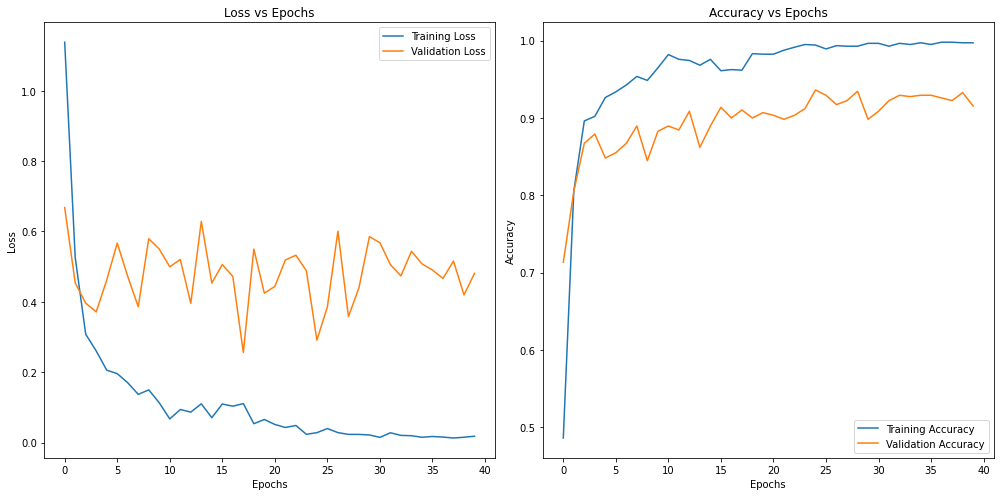

In [12]:
#calling the above plot_history function and passing the training object as parameter
plot_history(model_history)

<font color ='darkblue'>LOSS CURVE</font>
    
    At the starting of the epochs the training loss was high compared to the validation loss.The training loss 
    gradually decreased with the increase in Epochs .The training loss of the model is well below 0.2
    
    The validation loss curve has not been smooth for us  because we have given importance on validation accuracy 
    to reduce the learning rate. 
    
    
<font color='darkblue'>ACCURACY CURVE</font>

    At the starting of the training our training accuracy was around 50% while the validation was higher.The training 
    accuracy started increasing gradually with the increase in epochs. We are having highest training accuracy of 0.948
    among all the epochs
    
    The validation accuracy of the model at the starting was around 0.7 and for few initial epochs it increased and fall
    then it started increasing ,The curve is more smooth than compared to the validation loss because whenever the model have seen a plateau for more than 5 epochs ,The learning rate was reduced by the ReduceLRonPlateau .The best accuracy the model ever acheived is 0.93610.

#### <font color='darkblue'> 12 Assigning the indices /labels of the classes</font>

In [13]:
label=list(train_set.class_indices)
print(label)

['200_fake', '200_real', '500_fake', '500_real']
